In [13]:
import numpy as np
import random
import math
import heapq
import multiprocess as mp
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime,date
import time
from island_ga import IslandGGA 
from chromosome import Chromosome 
from data_preprocessing import Data
import itertools
import yfinance as yf
import datetime

[*********************100%***********************]  1 of 1 completed


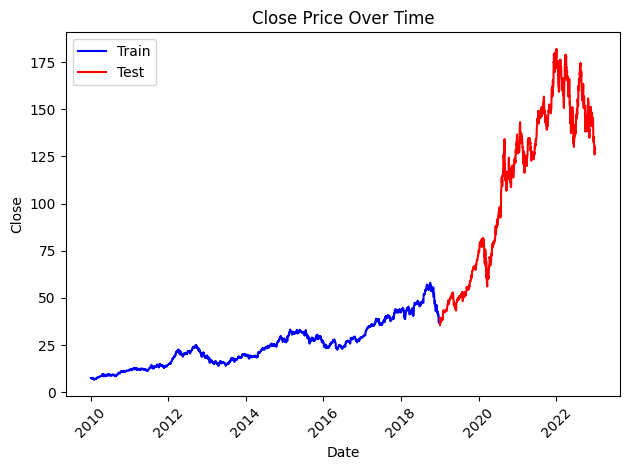

In [14]:
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
data = Data('AAPL',start_date,end_date,2019)
data.data_preprocess()

Running ring
GENERATION 0 START
Generation 0: Best fitness = 372.5021407426023 Average Fitness = 198.01551818216865
GENERATION 0 END
GENERATION 1 START
Generation 1: Best fitness = 424.3148251718037 Average Fitness = 235.2254054438878
GENERATION 1 END
GENERATION 2 START
Generation 2: Best fitness = 424.3148251718037 Average Fitness = 248.34050769783087
GENERATION 2 END
GENERATION 3 START
Generation 3: Best fitness = 471.987063375646 Average Fitness = 263.8635485025342
GENERATION 3 END
GENERATION 4 START
Generation 4: Best fitness = 580.1043356734488 Average Fitness = 283.70241231180376
GENERATION 4 END
GENERATION 5 START
Generation 5: Best fitness = 647.892152691341 Average Fitness = 314.91025003259733
GENERATION 5 END
GENERATION 6 START
Generation 6: Best fitness = 647.892152691341 Average Fitness = 341.86879628352347
GENERATION 6 END
GENERATION 7 START
Generation 7: Best fitness = 647.892152691341 Average Fitness = 364.75149413002123
GENERATION 7 END
GENERATION 8 START
Generation 8: 

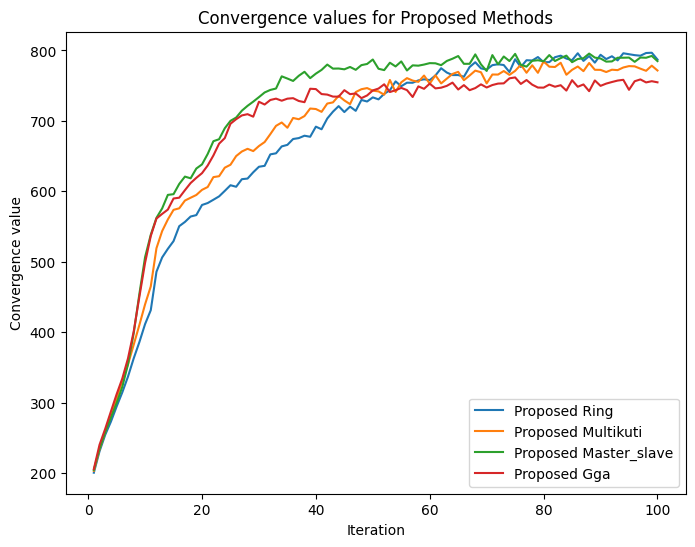

In [16]:
import numpy as np
import matplotlib.pyplot as plt

evolve_strategy = ["ring", "multikuti", "master_slave", "gga"]
num_runs = 5  # Number of runs to perform

convergence_values = []

for i in evolve_strategy:
    values = []
    for _ in range(num_runs):
        ga = IslandGGA(data=data.train_data, num_islands=8, m_iter=10, num_iter=100, pSize=200, r_cross=0.4, r_mut=0.1,
                       strategies=data.strategies, evolve_strategy=i)
        ga.evolve()
        values.append(ga.convergence_values)
    convergence_values.append(np.mean(values, axis=0))  # Average convergence values across runs

# Plot the convergence values for each evolutionary strategy
plt.figure(figsize=(8, 6))
for i in range(len(evolve_strategy)):
    plt.plot(np.arange(1, 101), convergence_values[i], label='Proposed ' + str(evolve_strategy[i]).capitalize())
plt.xlabel('Iteration')
plt.ylabel('Convergence value')
plt.title('Convergence values for Proposed Methods')
plt.legend()
plt.show()


In [19]:
from scipy import stats

# Perform one-way ANOVA
f_value, p_value = stats.ttest_ind(convergence_values[0], convergence_values[-1])

# Print the results
print(p_value)


0.5364612363245738


In [ ]:

values = []
evolve_strategy =["ring", "multikuti","master_slave","gga"]

for i in evolve_strategy:
    ga = IslandGGA(data=data.train_data,num_islands=8,m_iter= 10,num_iter=100,pSize=200,r_cross=0.4,r_mut=0.1,strategies=data.strategies,evolve_strategy=i)
    ga.evolve()
    values.append(ga.convergence_values)
   
# convergence values for each crossover rate
convergence_values = values
# plot the convergence values for each crossover rate
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(np.arange(1, 101), convergence_values[i], label='Proposed ' + str(evolve_strategy[i]).capitalize())
plt.plot(np.arange(1, 101), convergence_values[-1], label='Previous Method')
plt.xlabel('Iteration')
plt.ylabel('Convergence value')
plt.title('Convergence values for Proposed Methods')
plt.legend()
plt.show()